# Handwritter Digit Classifier
    - Neural Network -

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.datasets import mnist
from keras.models import Sequential
# from keras.utils import np_utils
from keras.layers import Dense, Activation, Input
from tensorflow.keras.utils import to_categorical

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_shape:', X_train.shape)
print('X_test', X_test.shape)

  499712/11490434 ━━━━━━━━━━━━━━━━━━━━ 20:42 113us/step

KeyboardInterrupt: 

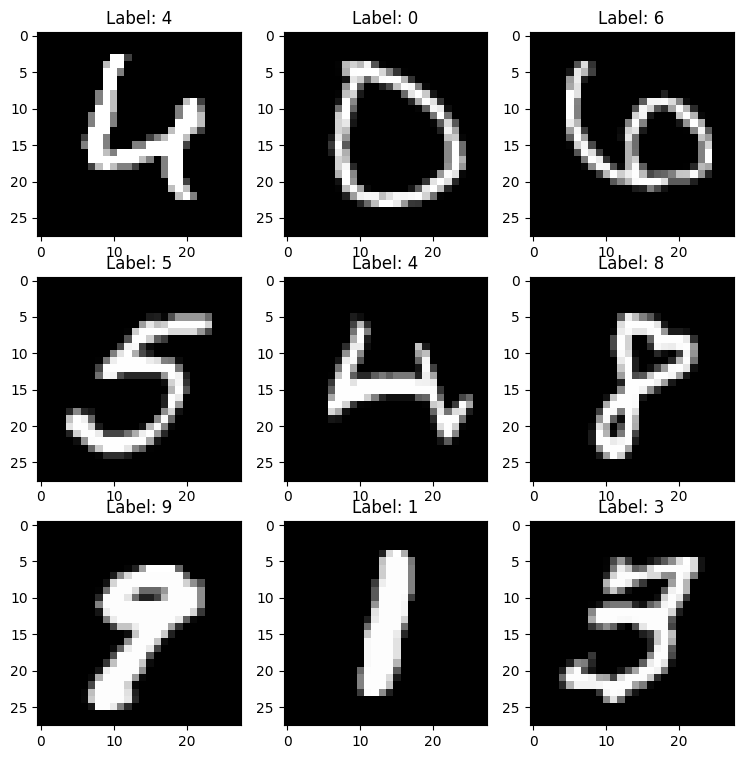

In [62]:
plt.rcParams['figure.figsize'] = (9, 9)
for i in range(9):
  plt.subplot(3, 3, i+1)
  num = np.random.randint(0, len(X_train))
  plt.imshow(X_train[num], cmap='gray',  interpolation='none')
  plt.title(f"Label: {y_train[num]}")  # Hiển thị nhãn tương ứng
plt.show()

In [63]:
X_train, X_test = X_train.reshape(60000, 784), X_test.reshape(10000, 784)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')
X_train /= 255
X_test /= 255

In [64]:
print('X_shape:', X_train.shape)
print('X_test:', X_test.shape)

X_shape: (60000, 784)
X_test: (10000, 784)


In [65]:
mn_class = 10
y_train = to_categorical(y_train, mn_class)
y_test = to_categorical(y_test, mn_class)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [72]:
model = Sequential()
model.add(Input(shape=(784, )))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('sigmoid'))

In [71]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 932,362 (3.56 MB)

 Trainable params: 932,362 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [74]:
model.fit(X_train, y_train, batch_size=128, epochs=5, decay_rate=0.9)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.8570 - loss: 0.4498
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9723 - loss: 0.0886
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9822 - loss: 0.0560
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9880 - loss: 0.0381
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9909 - loss: 0.0296
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9932 - loss: 0.0211
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9942 - loss: 0.0174
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9960 - loss: 0.0123
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9960 - loss: 0.0112
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9971 - loss: 0.0090


In [78]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9784 - loss: 0.1141
Loss: 0.09842085838317871
Accuracy: 0.9815999865531921


In [81]:
# Đường dẫn lưu mô hình trong Google Drive
model_save_path = '/content/drive/MyDrive/Colab Notebooks/my_model.keras'

# Lưu mô hình vào Google Drive
model.save(model_save_path)

print("Model has been saved to Google Drive.")


Model has been saved to Google Drive.
